In [1]:
#Kaggle dataset - Mall segmentation Dataset link - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Importing libraries

In [14]:
#Importing basic data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing KMeans from sklearn (Machine learning library)
from sklearn.cluster import KMeans

# Load the Data

In [3]:
#load the CSV file
df = pd.read_csv(r"C:\Users\Aman Sinha\Downloads\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [5]:
df.info() #checking columns. data types, null values
df.describe() # Summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Let's use Annual Income and Spending Score

In [8]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [11]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Elbow Method - To find the best K

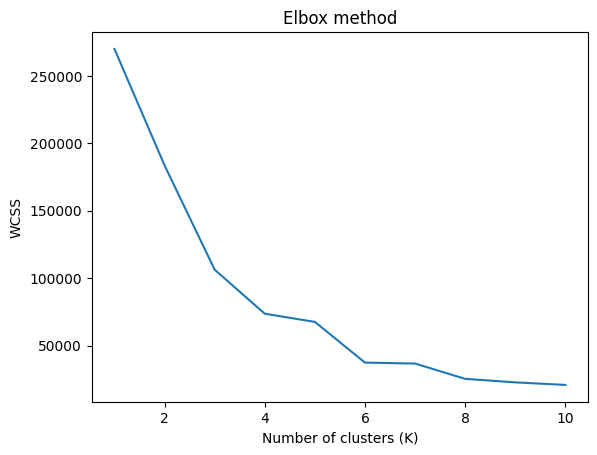

In [21]:
wcss = [] # WCSS = withing cluster sum of squares (total variance in each cluster)

#Try K from 1 to 10
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbox method')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()


#Lets take K = 4, the elbox point

In [35]:
#Train KMeans Model with K = 4
kmeans= KMeans(n_clusters=4) # Create model with 5 clusters
y_kmeans = kmeans.fit_predict(X) # Fit and get clusters labels

# Visualize Clusters 

In [36]:
# Add labels to the original dataframe
df['Cluster']= y_kmeans

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


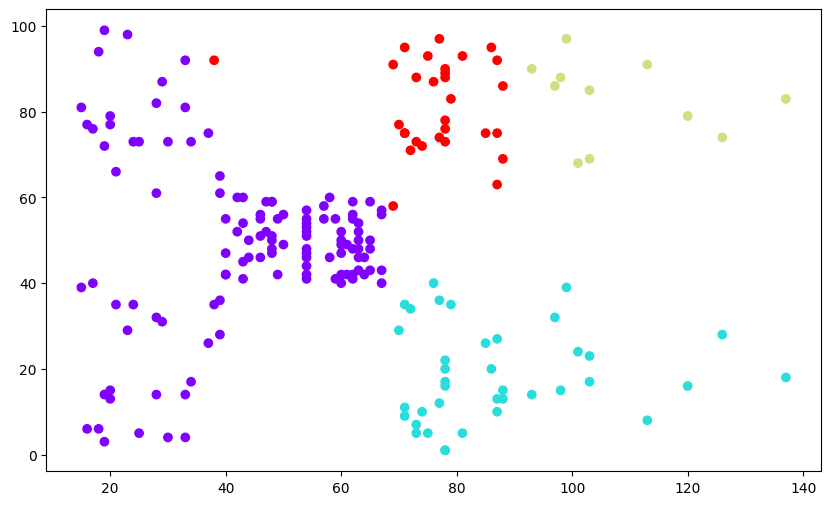

In [42]:
# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans,cmap='rainbow')